In [1]:
import numpy as np
import math
from plotnine import *
import pandas as pd

Instructions: Please answer the following questions in your own words. For Questions 1-6, each answer should be at least a short paragraph. For Questions 7-8, please include your code, if applicable. 

Please write your answers on a separate sheet, clearly identifying the question you are answering (e.g. 1, 2, etc).
Please label your document/folder with “Date_LastName_FirstName_DataScience_Position” where Date is the date the exam is completed in the form DDMMMYYYY. Please include in the body of the document, the time spent on the exam.


#### 4 hours were spent on the exam

### 1. Please describe an internet product you like (app or web application) and how you would improve it?

An application I commonly use in the hospital is GE pacsweb, which is used for viewing radiographic images online.  It is a powerful, but flawed application.  While there are many issues with it, I will limit my discussion to its search functionality.  

1. The application presents a header row with the name of the fields, but does not tell you the format in which they should be entered.  While this is fine for certain fields like _Patient Name_ and _Accession_, for other fields like _Mod_ and _Study Date_ you have to see the results to understand the requisite format.  There could be faint text already in those fields demonstrating how the queries should be entered. 

1. Fields with a limited number of values, like _Mod_ and _Location_ should allow you to choose from a drop down in addition to manually entering in the value.  This is necessary in the case of the aforementioned fields as their values are specific codes, which there is no assumption that the user knows a priori.  

1. A feature which would be nice is the ability to do partial searches, e.g., part of a name, procedure or date.  There is some ability to do that now but it is very limited, without the ability to use wildcards and all queries are case specific.

1. Often times you might want to find all other studies done on a particular patient, while this is possible within the study itself (figuring out how to do that is not so simple either), this is impossible to do from the search results. In addition, there is no ability to copy the information in the search results, not at the field level, study level or entire results list.

### 2. What is the difference between over-fitting and under-fitting? How have you avoided over-fitting in your projects?

When modeling data, two of the most important considerations are generalizability and accuracy (this accuracy just refers to the correctness of a model in its predictions, not the mathematical term).  There is always a balance when training models between these two considerations.  Usually, the better the model's predictions for the training set, the less generalizable it is for other data.  When a model is too well fit to the training data and as a result is not generalizable to other test data, it is termed overfit.  Alternatively, if the model does as well or better on the test data than the training data, this is usually due to underfitting.  

These terms can also be thought of in the context of model complexity.  Usually, the more complex the model the better it fits to a specific data set and the less generalizable it is, i.e., overfitting.  The less complicated a model is, the more generalizable it tends to be to other data.  As the model gets less and less complex it becomes more and more generalizable, in the sense that it does equally well at predicting more and more data, but what is actually happening is that it does equally poorly on all data, in other words, underfit.

The most common way to avoid overfitting is to penalize the model coefficients, i.e., regularization.  The larger the model coefficients the more each independent variable contributes to the prediction.  The most common types of regularization are LASSO (also known as L1) and ridge (also known as L2).  The only difference between them is that ridge penalizes the square of the coefficients while LASSO just penalizes the absolute value of the coefficients.

### 3. What is the difference between the L1-norm and the L2-norm?

Given a series of observations, $y_1, y_2, \ldots , y_n$, and predictions, $\hat{y}_1, \hat{y}_2, \ldots , \hat{y}_n$ the norm defines the distance between the true and predicted values.

The generic $p$-norm for any set of observations and predictions is:

$$ \left\|\mathbf {\mathbf{y} - \mathbf{\hat{y}}} \right\|_{p}:={\bigg (}\sum _{i=1}^{n}\left|y_{i} - \hat{y}_i\right|^{p}{\bigg )}^{1/p}$$

The L1-norm, or manhattan distance, is equal to $\sum _{i=1}^{n}\left|y_{i} - \hat{y}_i\right|$  

The L2-norm, or euclidean distance, is equal to $\sqrt{\sum _{i=1}^{n}\left|y_{i} - \hat{y}_i\right|^2 } $

The L1-norm is the sum of the absolute errors.  It is robust to outliers, but also is less stable to small shifts in the dataset than the L2-norm, which is the square root of the sum of squared errors.

### 4. What is the probability of rolling at least one 6 on 6 rolls of a fair 6-sided die. On 12 rolls? 600 rolls? Which one has the highest probability?

p( $\ge$ one six in $x$ rolls) = 1 - p(zero sixes in $x$ rolls) = 1 - $\left(\frac{5}{6}\right)^x$

In [2]:
def p_gte_one(x: int):
    return 1 - (5/6)**(x)
print(f'probability of rolling a 6 at least one time in six rolls is {round(p_gte_one(6),4)}')
print(f'probability of rolling a 6 at least one time in twelve rolls is {round(p_gte_one(12),4)}')
print(f'probability of rolling a 6 at least one time in six-hundred rolls is {round(p_gte_one(600),4)}')

probability of rolling a 6 at least one time in six rolls is 0.6651
probability of rolling a 6 at least one time in twelve rolls is 0.8878
probability of rolling a 6 at least one time in six-hundred rolls is 1.0


Rolling at least one 6 in 600 rolls has the highest probability

### 5. What is the difference between these three activation functions: Sigmoid, Tanh and ReLU.

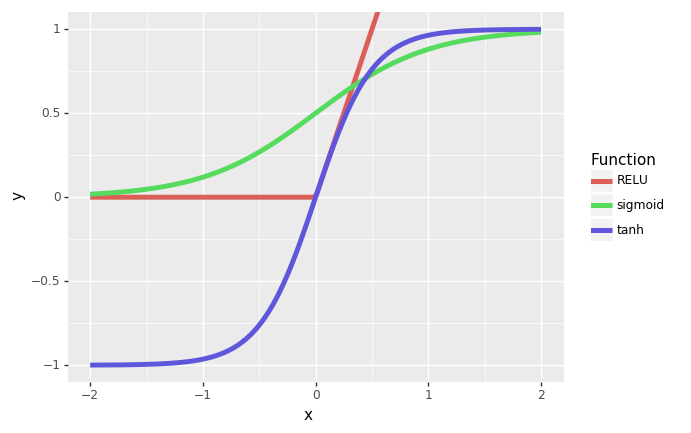

<ggplot: (8751543069872)>

In [3]:
def sig(x):
    return 1/(1+math.exp(-x))
def tanh(x):
    return (math.exp(x) - math.exp(-x))/(math.exp(x) + math.exp(-x))
def relu(x):
    return max(x,0)
x_rng = np.linspace(-2,2,200)
# multiplying x by 2 to make the functions easier to see
y_sig = [sig(x*2) for x in x_rng]
y_tanh = [tanh(x*2) for x in x_rng]
y_relu = [relu(x*2) for x in x_rng]
df = pd.DataFrame({'x':x_rng, 'sigmoid':y_sig, 'tanh': y_tanh, 'RELU': y_relu})
df_melt = df.melt(id_vars=['x'], value_vars=['sigmoid', 'tanh', 'RELU'], var_name='Function', value_name='y')
ggplot(df_melt) + geom_line(aes('x', 'y', color='Function'), size=2) + coord_cartesian(ylim=(-1,1))

When comparing the two sigmoidal functions, their shape is similar but they vary in their mean value.  The hyperbolic tangent is symmetric around the origin, thus on average its output will be close 0, while this is not true for the logistic function (or the RELU) and as a result its mean is positive.  Outputs with an average closer to 0 tend to converge faster.  However, when using symmetric sigmoids, like tanh, the error surface can be very flat near the origin, which can be avoided by not initializing with very small weights.  Logistic functions can be very useful as activations at the last layer to give an output between 0 and 1.

An issue that arises with all sigmoidal functions is vanishing gradients.  For example the gradient of $\tanh = 1 -\tanh^2 x$, which means that the gradient has a range between 0 and 1.  When there are many layers of a neural network each with a tanh activation layer, which all get multiplied during backpropagation due to the chain rule, the resulting gradient can become effectively zero.  This means that the weights in the first few layers change very little and as a result train very slowly.  This is not an issue for the RELU, as it has a constant gradient of either 0 or 1, depending on whether the value was negative or positive, respectively.  

### 6. What is data augmentation? And please describe the data augmentation methods you used.

Data augmentation is a method of generating more samples for training and testing models.   There are two main reasons to use data augmentation.  The first is to increase sample size, as many models are limited by the amount of data provided.  The second reason to perform data augmentation is to expose the model to a wider variety of samples, with the hope of preventing overfitting.  

The two main types of augmentation I have used are based on the two domains I have mainly worked in images and text.  In the image domain augmentations are specific to the dataset.  For example, horizontal rotations make sense when looking at a dog or cat, but not when looking at a picture of text or a chest CT (dextrocardia and situs inversus are not common enough to warrant that augmentation).  The main ones I have worked with are rotations, zooms/crops, flips, contrast, brightness, balance, stretch, and pixelation/Gaussian noise.  With respect to text the most common ones I have used are synonym insertion, sentence dropout (when working with documents), and sentence reordering.  

###  7. Please write the formula of the DICE coefficient between the two samples P(rediction) and T(arget).
Is the DICE Coefficient differentiable? If so, please give the gradient, if not please tell the reason. Can we find a differentiable way to approximate the DICE score?


The Jaccard index, is a measure of the intersection of two objects divided by their union.

$$J(P,T) = \frac{\left|P \cap T \right|}{\left|P \cup T \right|} = \frac{\left|P \cap T \right|}{\left|P \right| + \left|T\right| - \left|P\cap T\right|} = \frac{TP}{TP + FP + FN}$$

The DICE coefficient (DSC) is a variation on the Jaccard index

$$ DSC(P,T) = \frac{2 \left|P \cap T\right|}{\left| P \right| + \left| T \right|} = \frac{2TP}{2TP + FP + FN} = \frac{2\; J(P,T)}{1 + J(P,T)}$$

The problem with this form is that it is discrete, i.e., the only values it can take on are 0 and 1.  As a result this form of the dice coefficient is not differentiable.  In lieu of the discerete form you can take a probabilistic form of the DSC, which is differentiable. Two common forms of the probabilistic version of the DSC are:

$$D(p,t) = \frac{2\sum\limits_i^N p_it_i}{\sum\limits_i^N p_i  + \sum\limits_i^N t_i}$$

$$D(p,t) = \frac{2\sum\limits_i^N p_it_i}{\sum\limits_i^N p_i^2  + \sum\limits_i^N t_i^2}$$

where $p_i \in [0,1]$  and $t_i \in \{0,1\}$. This form is differentiable with respect to the $j$-th voxel of the prediction as 


$$\frac{\partial D}{\partial p_j} = \frac{2t_j \left(\sum\limits_i^Np_i + \sum\limits_i^Nt_i\right) }{\left(\sum\limits_i^N p_i + \sum\limits_i^N t_i\right)^2}$$

$$\frac{\partial D}{\partial p_j} = 2 \left[\frac{t_j \left(\sum\limits_i^Np_i^2 + \sum\limits_i^Nt_i^2\right) - 2p_j \left(\sum\limits_i^N p_ig_i\right)}{\left(\sum\limits_i^N p_i^2 + \sum\limits_i^N t_i^2\right)^2}\right]$$

The reason to use the squared version, which is taken from the paper cited below, is that the gradient depends on both the predicted and target values at every voxel.


Milletari, F., Navab, N., & Ahmadi, S.-A. (2016). V-Net: Fully Convolutional Neural Networks for Volumetric Medical Image Segmentation. ArXiv:1606.04797 [Cs]. Retrieved from http://arxiv.org/abs/1606.04797

### 8. Please implement the 3D DICE function:  
Input: Prediction: Batch x nclasses x H x W x D,   
Target: Batch x H x W x D, where each value is 0 <= targets[i] <= nclasses-1  
Output: Dice score from 0 to 1. The larger the score, the better the performance.
Python is preferred in this question, but we will consider MATLAB, C++, and lua as well. **Please try to make the code as efficient as possible.**


In [4]:
def dice_coef(y_true: np.ndarray, y_pred: np.ndarray, smooth = 1):
    y_true_f = np.ndarray.flatten(y_true)
    y_pred_f = np.ndarray.flatten(y_pred)
    intersection = np.sum(y_true_f * y_pred_f)
    return (2 * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

In [5]:
%%time
dimshp = 3
dimsz = 100
shp_sz = 50
inpt = np.zeros(tuple([dimsz]*dimshp), dtype='int')
trgt = np.zeros(tuple([dimsz]*dimshp), dtype='int')
val = 1
inpt_val = [np.random.randint(dimsz - shp_sz) for _ in range(dimshp)]
trgt_val = [np.random.randint(dimsz - shp_sz) for _ in range(dimshp)]
inpt_val = [slice(x,x+shp_sz) for x in inpt_val]
trgt_val = [slice(x,x+shp_sz) for x in trgt_val]
inpt[inpt_val] = val
trgt[trgt_val] = val
dice = dice_coef(inpt, trgt, val)
print(dice)

0.172035311859
CPU times: user 27.5 ms, sys: 25.2 ms, total: 52.7 ms
Wall time: 50.5 ms


### 9. Please implement Cross Entropy Cost Function.

In [6]:
def x_entropy(y, y_hat):
    return -math.log(y_hat) if y == 1 else -math.log(1 - y_hat)        

In [7]:
x_entropy(1,0.00001)

11.512925464970229

###  10. Please implement weighted cross entropy cost function.
Weighted Cross Entropy, is a new cost function which penalized at each position with different weights described as:

$L\left(y, \hat{y}\right) = -\dfrac{1}{N}\sum\limits_{i=1}^{N}\sum\limits_{c=1}^{3} w_i^cy_i^c\log\hat{y}_i^c$

Where $\hat{y}_i^c$ denotes the probability of voxel i belongs to class c (here c = 3). $w_i^c$ denotes the weight and $y_i^c$ indicates the ground truth label for voxel i.

In [8]:
def w_x_entropy(wghts: np.ndarray, y_true: np.ndarray, y_hat: np.ndarray):
    N = wghts.shape[0]
    log_yhat = np.log(y_hat)
    mat_prod = wghts * y_true * log_yhat
    return -1*np.sum(mat_prod)/N

In [9]:
y_hat = np.array([[2,4,8], [2,2,2], [2, 16, 32]])
y_true = np.array([[0,0,1], [1,0,0], [0,1,0]])
wghts = np.array([[1,1,1], [1,1,1], [1,1,1]])
w_x_entropy(wghts, y_true, y_hat)

-1.8483924814931874